# Random forests - Bank marketing campaign

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

# hyper = {
#     'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
# }

# pipe = Pipeline([
#     ('pre', preprocessor),
#     ('grid', GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), hyper, cv=5, scoring='roc_auc'))])

pipe = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestClassifier(class_weight='balanced'))])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')

y_pred = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 1.0
[[ 3700     0]
 [    0 29250]]
Recall= 1.0
Accuracy= 0.910536537994659
[[ 399  541]
 [ 196 7102]]
Recall= 0.42446808510638295


In [ ]:
y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

hyper = {
    'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
}

# pipe = Pipeline([
#     ('pre', preprocessor),
#     ('grid', GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), hyper, cv=5, scoring='roc_auc'))])

pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(RandomForestClassifier(class_weight='balanced'), hyper, cv=5))])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')

y_pred = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 0.8279514415781487
[[ 3531   169]
 [ 5500 23750]]
Recall= 0.9543243243243243
Accuracy= 0.8230152949745084
[[ 891   49]
 [1409 5889]]
Recall= 0.9478723404255319


# Regression trees and Random forests - Data car radios

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import datetime

df = pd.read_excel('/content/data_carradios.xlsx')

def get_ages(col):
  result = (datetime.datetime.now()-col).astype('<m8[Y]')
  result = pd.DataFrame(result)
  return result

ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one')),
    ('scale', StandardScaler())
])

def get_weekdays(col):
  result = col.iloc[:,0].dt.weekday
  result = pd.DataFrame(result)
  return result

weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one')),
    ('oneh', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('ages_tr', ager, ['bdate']),
    ('weekd_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team']),
    ('scaler', StandardScaler(), ['prized', 'prizeq'])],
    remainder='passthrough')

X = df.drop('perc_defec', axis=1)
y = df['perc_defec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe = Pipeline([
    ('pre', preprocessor),
    ('tree', DecisionTreeRegressor())])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
rsme = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)

print(f'MAE= {mae}')
print(f'RSME= {rsme}')
print(f'R2= {r2}')
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rsme = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE= {mae}')
print(f'RSME= {rsme}')
print(f'R2= {r2}')

MAE= 2.6502624234792984
RSME= 3.676162025277643
R2= 0.940571315604777
MAE= 3.9040616774891777
RSME= 5.212007208008061
R2= 0.8846262266400601


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import datetime

df = pd.read_excel('/content/data_carradios.xlsx')

def get_ages(col):
  result = (datetime.datetime.now()-col).astype('<m8[Y]')
  result = pd.DataFrame(result)
  return result

ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one')),
    ('scale', StandardScaler())
])

def get_weekdays(col):
  result = col.iloc[:,0].dt.weekday
  result = pd.DataFrame(result)
  return result

weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one')),
    ('oneh', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('ages_tr', ager, ['bdate']),
    ('weekd_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team']),
    ('scaler', StandardScaler(), ['prized', 'prizeq'])],
    remainder='passthrough')

X = df.drop('perc_defec', axis=1)
y = df['perc_defec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

hyper = {
    'ccp_alpha': [0.001, 0.003, 0.1, 0.3, 0.5]
}
pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(DecisionTreeRegressor(), hyper, cv=5))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
rsme = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)

print(f'MAE= {mae}')
print(f'RSME= {rsme}')
print(f'R2= {r2}')
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rsme = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE= {mae}')
print(f'RSME= {rsme}')
print(f'R2= {r2}')

MAE= 3.2898610178578025
RSME= 4.271822451632366
R2= 0.9197521852026403
MAE= 3.6986164844013856
RSME= 4.921032250811609
R2= 0.8971487666569046


# Random forest - Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import datetime

df = pd.read_excel('/content/data_carradios.xlsx')

def get_ages(col):
  result = (datetime.datetime.now()-col).astype('<m8[Y]')
  result = pd.DataFrame(result)
  return result

ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one')),
    ('scale', StandardScaler())
])

def get_weekdays(col):
  result = col.iloc[:,0].dt.weekday
  result = pd.DataFrame(result)
  return result

weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one')),
    ('oneh', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('ages_tr', ager, ['bdate']),
    ('weekd_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team']),
    ('scaler', StandardScaler(), ['prized', 'prizeq'])],
    remainder='passthrough')

X = df.drop('perc_defec', axis=1)
y = df['perc_defec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# hyper = {
#     'ccp_alpha': [0.001, 0.003, 0.1, 0.3, 0.5]
# }
# pipe = Pipeline([
#     ('pre', preprocessor),
#     ('grid', GridSearchCV(DecisionTreeRegressor(), hyper, cv=5))])

pipe = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestRegressor())])


pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
rsme = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)

print(f'MAE= {mae}')
print(f'RSME= {rsme}')
print(f'R2= {r2}')
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rsme = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE= {mae}')
print(f'RSME= {rsme}')
print(f'R2= {r2}')

MAE= 2.7557244240058334
RSME= 3.7194822763778697
R2= 0.9391624362414951
MAE= 3.76134865916975
RSME= 5.071643788127229
R2= 0.8907567612934356


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import datetime

df = pd.read_excel('/content/data_carradios.xlsx')

def get_ages(col):
  result = (datetime.datetime.now()-col).astype('<m8[Y]')
  result = pd.DataFrame(result)
  return result

ager = Pipeline([
    ('ages', FunctionTransformer(get_ages, feature_names_out='one-to-one')),
    ('scale', StandardScaler())
])

def get_weekdays(col):
  result = col.iloc[:,0].dt.weekday
  result = pd.DataFrame(result)
  return result

weeker = Pipeline([
    ('weekd', FunctionTransformer(get_weekdays, feature_names_out='one-to-one')),
    ('oneh', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer([
    ('ages_tr', ager, ['bdate']),
    ('weekd_tr', weeker, ['datep']),
    ('team_tr', OneHotEncoder(drop='first'), ['team']),
    ('scaler', StandardScaler(), ['prized', 'prizeq'])],
    remainder='passthrough')

X = df.drop('perc_defec', axis=1)
y = df['perc_defec']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

hyper = {
    'ccp_alpha': [0.001, 0.003, 0.1, 0.3, 0.5],
    'n_estimators': [10, 50, 100, 150]
}
pipe = Pipeline([
    ('pre', preprocessor),
    ('grid', GridSearchCV(RandomForestRegressor(), hyper, cv=5))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
rsme = mean_squared_error(y_train, y_pred, squared=False)
r2 = r2_score(y_train, y_pred)

print(f'MAE= {mae}')
print(f'RSME= {rsme}')
print(f'R2= {r2}')
y_pred = pipe.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rsme = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'MAE= {mae}')
print(f'RSME= {rsme}')
print(f'R2= {r2}')

MAE= 3.290890453747719
RSME= 4.259988645928917
R2= 0.9201961744913104
MAE= 3.730504647155534
RSME= 4.947784819175055
R2= 0.8960274515768888


# Logistic regression

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Below, it is the plot of the logistic function

In [ ]:
#x = -1, -0.9, -0.8

x = np.linspace(-1, 1, 3)
x

array([-1.,  0.,  1.])

In [ ]:
x = np.linspace(-1, 1, 5)
x

array([-1. , -0.5,  0. ,  0.5,  1. ])

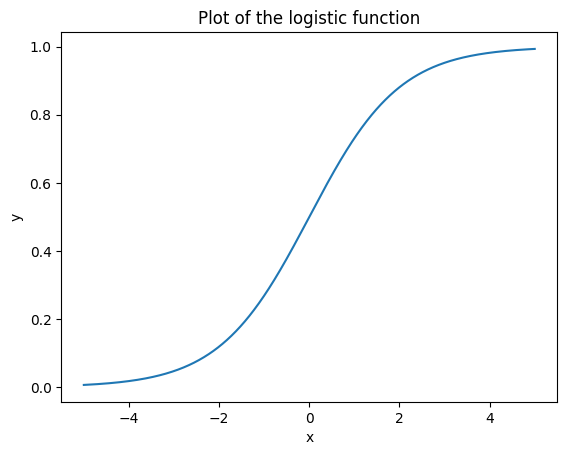

In [ ]:
x = np.linspace(-5, 5, 1000)
y = 1 / (1+np.exp(-x)) # logistic function

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of the logistic function')

plt.plot(x,y)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

# hyper = {
#     'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
# }

# pipe = Pipeline([
#     ('pre', preprocessor),
#     ('grid', GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), hyper, cv=5, scoring='roc_auc'))])

pipe = Pipeline([
    ('pre', preprocessor),
    ('logistic', LogisticRegression(max_iter=1000, class_weight='balanced'))])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')

y_pred = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 0.8606980273141123
[[ 3286   414]
 [ 4176 25074]]
Recall= 0.8881081081081081
Accuracy= 0.8608885651857247
[[ 830  110]
 [1036 6262]]
Recall= 0.8829787234042553


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


df = pd.read_csv('/content/bank_mark_campaign.csv', sep=';')

df = df.replace('unknown', np.nan) 

col_nan = df.columns[df.isna().any(axis=0)].to_list()
col_num = df.describe().columns.to_list()
df.columns.difference(col_nan + col_num)
col_cat = df.columns.difference(col_nan + col_num + ['y']).to_list()

na_treat = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('oneh', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer([
    ('na_tr', na_treat, col_nan),
    ('cat_tr', OneHotEncoder(drop='first'), col_cat),
    ('scale_tr', StandardScaler(), col_num)], 
    remainder='passthrough')

# hyper = {
#     'ccp_alpha': [0.001, 0.01, 0.1, 0.2, 0.5]
# }

# pipe = Pipeline([
#     ('pre', preprocessor),
#     ('grid', GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), hyper, cv=5, scoring='roc_auc'))])

pipe = Pipeline([
    ('pre', preprocessor),
    ('logistic', LogisticRegression(penalty='l1', 
                                    solver='saga', C=0.5,  max_iter=1000, 
                                    class_weight='balanced', random_state=45))])

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

acur = accuracy_score(y_train, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_train, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_train, y_pred, pos_label='yes')
print(f'Recall= {recall}')

y_pred = pipe.predict(X_test)

acur = accuracy_score(y_test, y_pred)
print(f'Accuracy= {acur}')
cm = confusion_matrix(y_test, y_pred, labels=['yes', 'no'])
print(cm)
recall = recall_score(y_test, y_pred, pos_label='yes')
print(f'Recall= {recall}')


Accuracy= 0.860546282245827
[[ 3288   412]
 [ 4183 25067]]
Recall= 0.8886486486486487
Accuracy= 0.8610099538722991
[[ 830  110]
 [1035 6263]]
Recall= 0.8829787234042553


AttributeError: ignored